범주형 데이터 장르를 이용한 테스트

In [9]:
import re
import requests
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action='ignore')

선형회귀모델을 통한 예제

In [10]:
df_genres=pd.read_csv("../data/all_game.csv")
df_genres.dtypes

title            object
metascore         int64
userscore       float64
genres           object
publisher        object
developer        object
release_date      int64
summary          object
rating           object
platform         object
dtype: object

장르들은 칼럼하나에 여러개 속해있음
장르들을 원핫인코딩으로 변환

In [16]:
dic_genre={}
for idx,row in df_genres.iterrows():
    nowg=row['genres']
    nowg=nowg.split('|')
    nowg.pop()
    for x in nowg:
        if(x in dic_genre):
            dic_genre[x]+=1
        else:
            dic_genre[x]=0
lgenres=list(dic_genre.keys())
jgenres = pd.DataFrame(np.zeros((len(df_genres), len(lgenres))),columns=lgenres)
for i, genre in enumerate(df_genres.genres):
    k=genre.split('|')
    k.pop()
    k=list(set(k))
    jgenres.loc[i, k] = 1
df_game = df_genres.join(jgenres.add_prefix('genre_'))
df_game_l=df_game.drop(['genres','summary'],axis=1)
df_game_l=pd.get_dummies(df_game_l, columns = ['developer','platform','rating','release_date','publisher'])

선형회귀를 위해 원핫인코딩으로 변환된 데이터 확인

In [17]:
print(df_game_l)

                                                title  metascore  userscore  \
0               Surgeon Simulator: Experience Reality         43       4.40   
1                Transformers: Rise of the Dark Spark         43       4.20   
2                                         NBA Live 14         43       2.60   
3                                            WWE 2K20         43       1.60   
4                                            VR Karts         42       5.60   
...                                               ...        ...        ...   
14350                                         Road 96         78       6.70   
14351              WRC 9 FIA World Rally Championship         78       6.00   
14352                                Shadow Warrior 3         78       6.00   
14353  Blast Brigade vs. the Evil Legion of Dr. Cread         78       6.53   
14354             Taiko no Tatsujin: The Drum Master!         78       8.00   

       genre_Simulation  genre_Virtual  genre_Caree

훈련용 x축 y축 추출

In [19]:
scaler = StandardScaler()
data_features=df_game_l.drop(['title','userscore'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, df_game_l['userscore'], random_state = 0)
print(X_train.shape)
pd.DataFrame(X_train)

(10766, 7132)


,metascore,genre_Simulation,genre_Virtual,genre_Career,genre_Action Adventure,genre_Sci-Fi,genre_General,genre_Arcade,genre_Sports,genre_Traditional,...,publisher_souvenir circ.,publisher_stillalive studios,publisher_superflat games,publisher_team ok,publisher_teedoubleuGAMES,publisher_tiny Build GAMES,publisher_tinyBuild,publisher_tobyfox,publisher_ustwo,publisher_worm club
3839,73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8455,73,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11758,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8264,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5923,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,72,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3264,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9845,78,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10799,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


선형 회귀모델 적용 

In [20]:
logreg =LinearRegression(fit_intercept=True, normalize=True)
logreg.fit(X_train, y_train)
print("테스트 점수 : {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수 : -86186941296705436585331523584.00


상관계수 조사

In [21]:
import scipy.stats as stats
U=df_game_l['userscore'].values
M=df_game_l['metascore'].values
print("correl: {:.2f}".format(stats.pearsonr(U,M)[0]))
print("pval: {:.4f}".format(stats.pearsonr(U,M)[1]))

correl: 0.48
pval: 0.0000


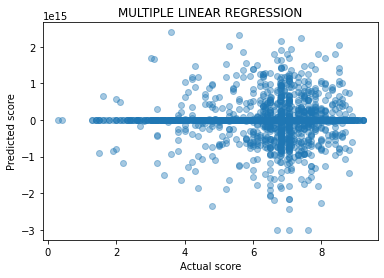

In [22]:
import matplotlib.pyplot as plt

y_predict = logreg.predict(X_test)
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual score")
plt.ylabel("Predicted score")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

원핫인코딩으로 범주형 데이터를 연속형 데이터로 변환했지만 단순선형회귀는 예측에 부적합하다.